# About Notebook:
In this notebook, i directly uploaded seaborn dataset of `healthexp` and from this dataset we extract 3 columns and delete 1 column. Then apply `Function Transformers` such as `Log Transformer, Reciprocal Transformer, Square Transformer, SquareRoot Transformer.`

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# for Q-Q plot
from scipy.stats import stats

from sklearn.compose import ColumnTransformer

In [7]:
df = sns.load_dataset("healthexp")

In [8]:
df.head(2)

,Year,Country,Spending_USD,Life_Expectancy
0,1970,Germany,252.311,70.6
1,1970,France,192.143,72.2


In [9]:
df.drop("Year", axis=1, inplace=True)

In [15]:
df.rename(columns={"Spending_USD":"Spendings","Life_Expectancy":"Life Expentancy"}, inplace=True)

In [17]:
df.head(2)

,Country,Spendings,Life Expentancy
0,Germany,252.311,70.6
1,France,192.143,72.2


In [18]:
df["Country"].unique()

array(['Germany', 'France', 'Great Britain', 'Japan', 'USA', 'Canada'],
      dtype=object)

In [19]:
df["Country"].value_counts()

Country
Japan            51
USA              51
Germany          50
Canada           44
Great Britain    43
France           35
Name: count, dtype: int64

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 274 entries, 0 to 273
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country          274 non-null    object 
 1   Spendings        274 non-null    float64
 2   Life Expentancy  274 non-null    float64
dtypes: float64(2), object(1)
memory usage: 6.6+ KB


In [21]:
listt = ["Spendings","Life Expentancy"]
for i in listt:
    df[i] = df[i].astype("int")

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 274 entries, 0 to 273
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Country          274 non-null    object
 1   Spendings        274 non-null    int32 
 2   Life Expentancy  274 non-null    int32 
dtypes: int32(2), object(1)
memory usage: 4.4+ KB


In [23]:
df.head(3)

,Country,Spendings,Life Expentancy
0,Germany,252,70
1,France,192,72
2,Great Britain,123,71


In [26]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(df["Country"])

country = le.transform(df["Country"])

In [30]:
x = df.drop(columns=["Country"])
y = pd.Series(country)

In [31]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.15, random_state=0)

In [32]:
x_train

,Spendings,Life Expentancy
173,3391,79
106,1930,77
27,647,72
226,4428,81
191,3750,80
...,...,...
251,5970,81
192,3588,81
117,3432,75
47,1191,74


In [33]:
y_train

173    2
106    0
27     2
226    0
191    2
      ..
251    2
192    1
117    5
47     5
172    0
Length: 232, dtype: int32

# Visualization : Before Function Transformation

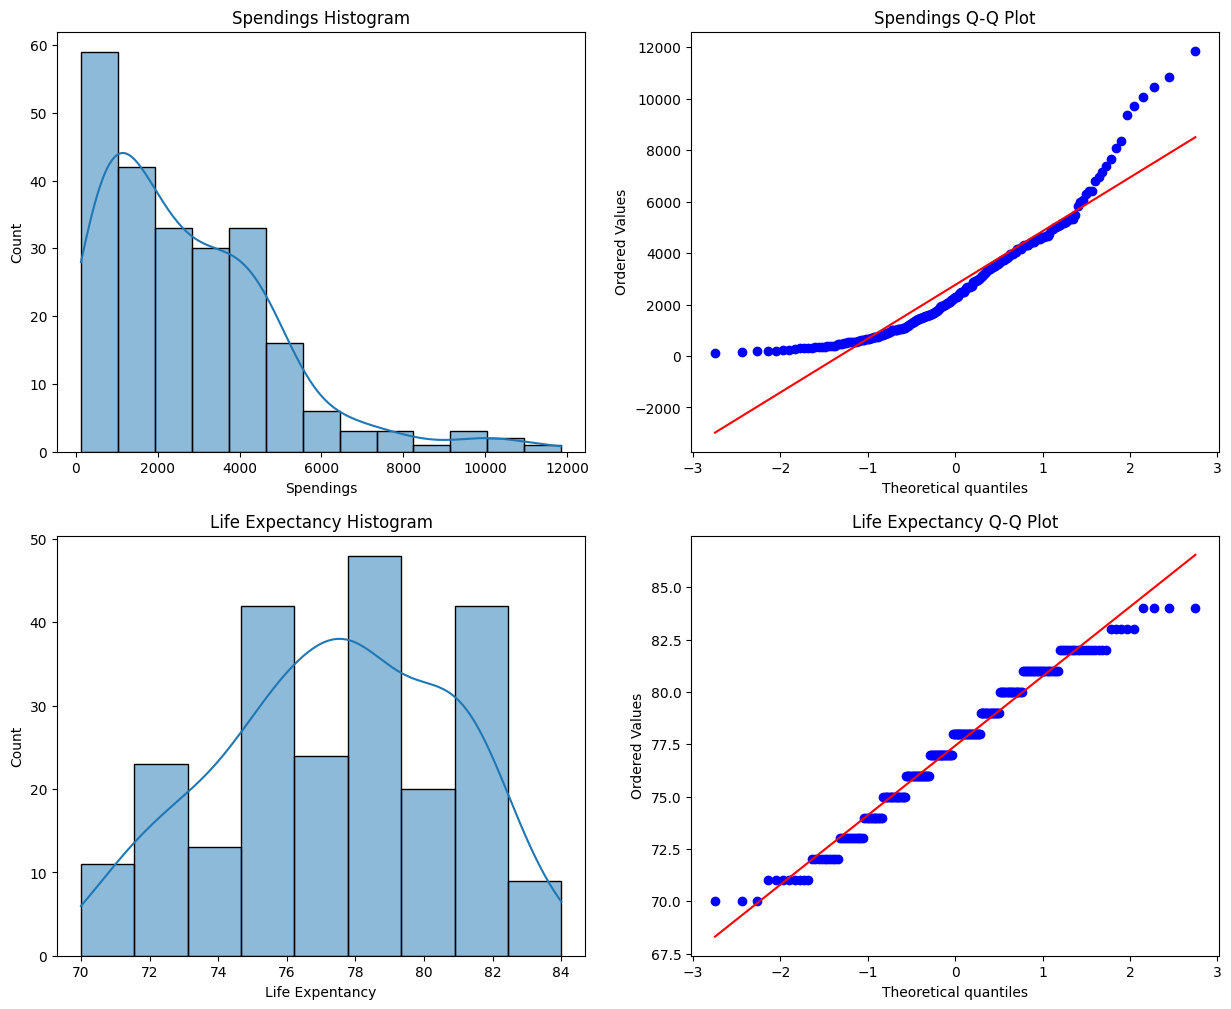

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats  # Import scipy.stats for probplot

figure, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 12))

sns.histplot(x_train["Spendings"], kde=True, ax=axes[0, 0])
axes[0, 0].set_title("Spendings Histogram")

stats.probplot(x_train["Spendings"], dist="norm", plot=axes[0, 1])
axes[0, 1].set_title("Spendings Q-Q Plot")

sns.histplot(x_train["Life Expentancy"], kde=True, ax=axes[1, 0])
axes[1, 0].set_title("Life Expectancy Histogram")

stats.probplot(x_train["Life Expentancy"], dist="norm", plot=axes[1, 1])
axes[1, 1].set_title("Life Expectancy Q-Q Plot")

plt.show()


# Accuracy Before Function Transformer(log)

In [35]:
logistic = LogisticRegression()
logistic.fit(x_train, y_train)

y_pred = logistic.predict(x_test)

print("Accuracy Score : ", accuracy_score(y_test, y_pred))

Accuracy Score :  0.23809523809523808


# Accuracy After Function Transformer(log1p)

In [51]:
from sklearn.preprocessing import FunctionTransformer

ft = FunctionTransformer(func=np.log1p)
ft.fit(x_train)
x_train_transform = ft.transform(x_train)
x_test_transform = ft.transform(x_test)

In [52]:
x_train_transform

,Spendings,Life Expentancy
173,8.129175,4.382027
106,7.565793,4.356709
27,6.473891,4.290459
226,8.395929,4.406719
191,8.229778,4.394449
...,...,...
251,8.694670,4.406719
192,8.185629,4.406719
117,8.141190,4.330733
47,7.083388,4.317488


In [53]:
logistic = LogisticRegression()
logistic.fit(x_train_transform, y_train)

y_pred = logistic.predict(x_test_transform)

print("Accuracy Score : ", accuracy_score(y_test, y_pred))

Accuracy Score :  0.21428571428571427


# Visualizations after Function Transformers(log1p)

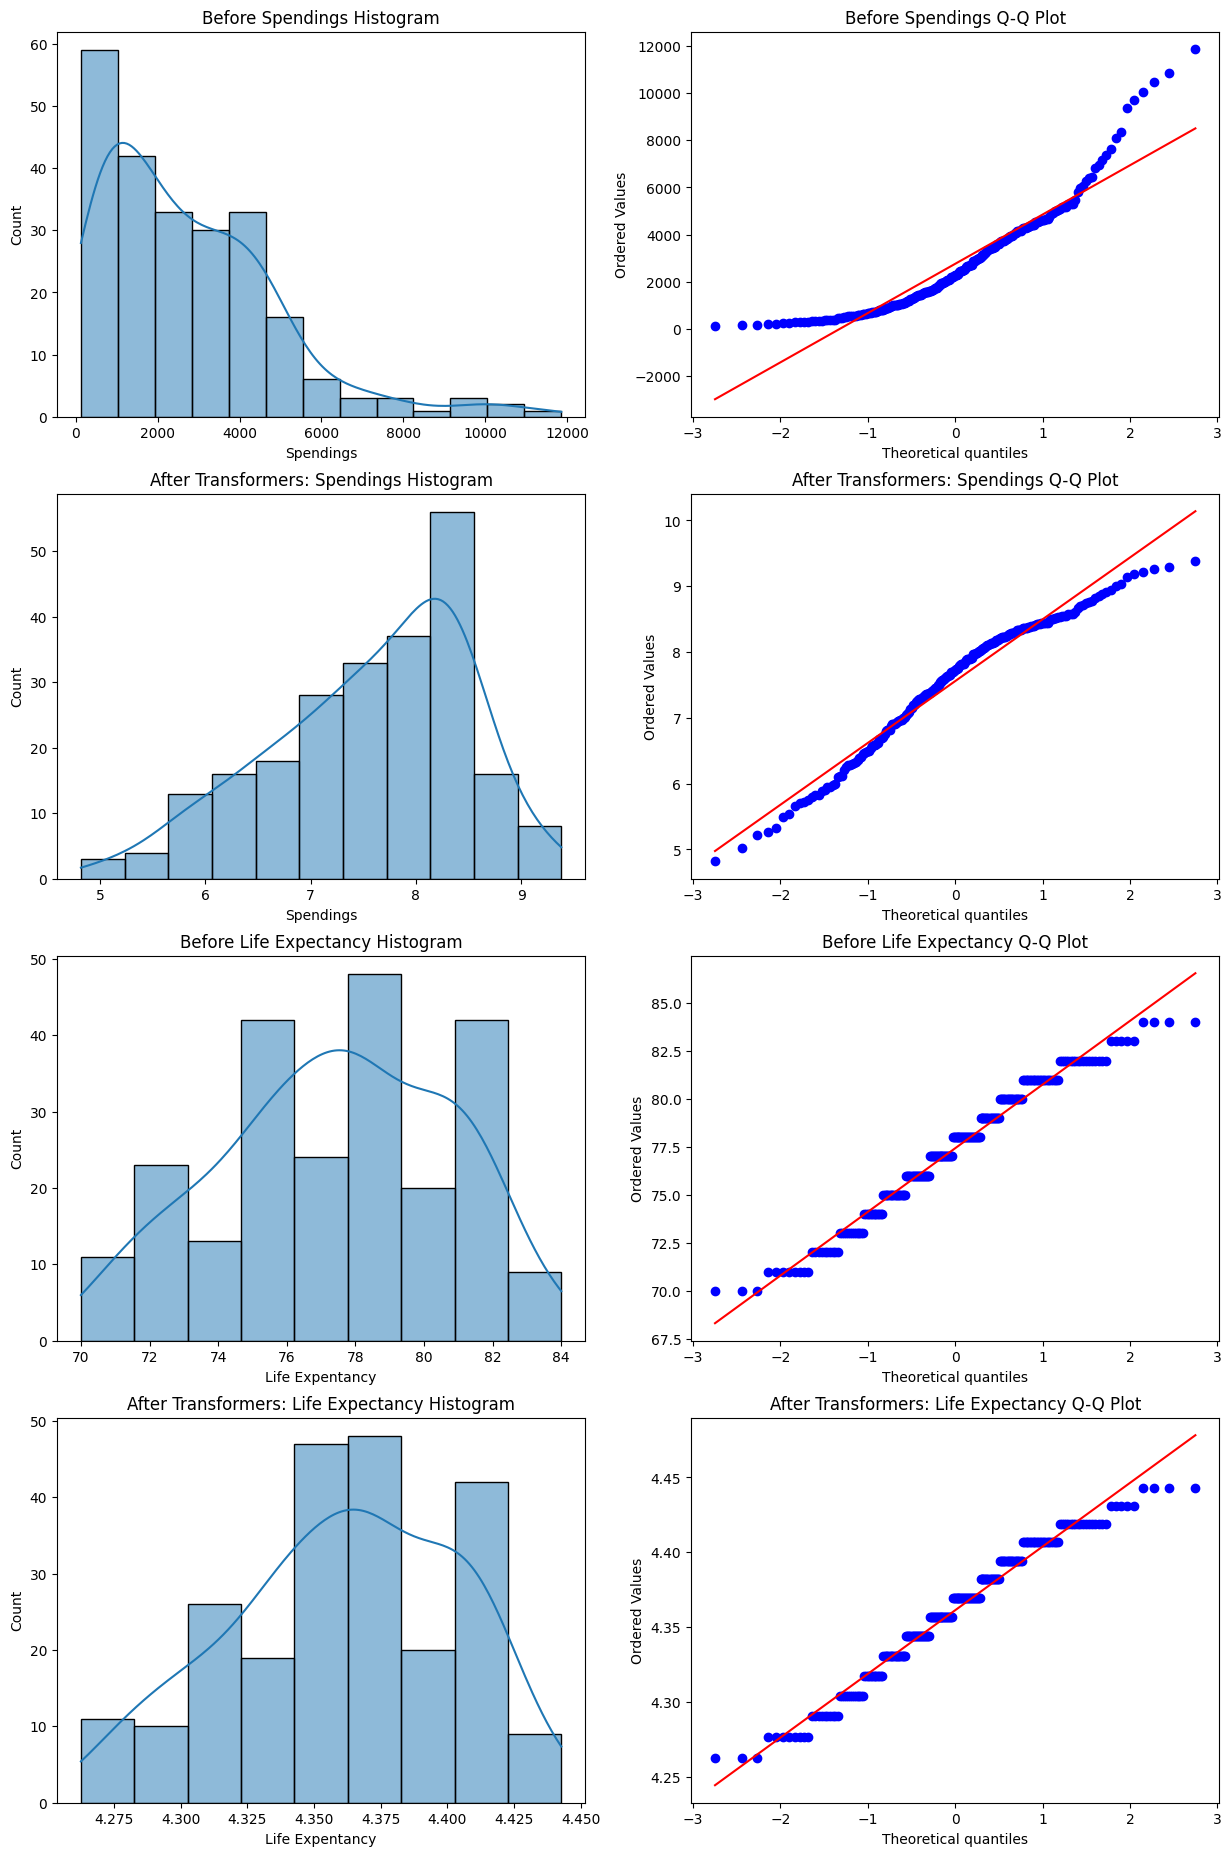

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats  # Import scipy.stats for probplot

figure, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 23))

sns.histplot(x_train["Spendings"], kde=True, ax=axes[0, 0])
axes[0, 0].set_title("Before Spendings Histogram")

stats.probplot(x_train["Spendings"], dist="norm", plot=axes[0, 1])
axes[0, 1].set_title("Before Spendings Q-Q Plot")

sns.histplot(x_train_transform["Spendings"], kde=True, ax=axes[1, 0])
axes[1, 0].set_title("After Transformers: Spendings Histogram")

stats.probplot(x_train_transform["Spendings"], dist="norm", plot=axes[1, 1])
axes[1, 1].set_title("After Transformers: Spendings Q-Q Plot")

sns.histplot(x_train["Life Expentancy"], kde=True, ax=axes[2, 0])
axes[2, 0].set_title("Before Life Expectancy Histogram")

stats.probplot(x_train["Life Expentancy"], dist="norm", plot=axes[2, 1])
axes[2, 1].set_title("Before Life Expectancy Q-Q Plot")

sns.histplot(x_train_transform["Life Expentancy"], kde=True, ax=axes[3, 0])
axes[3, 0].set_title("After Transformers: Life Expectancy Histogram")

stats.probplot(x_train_transform["Life Expentancy"], dist="norm", plot=axes[3, 1])
axes[3, 1].set_title("After Transformers: Life Expectancy Q-Q Plot")

plt.show()


# Accuracy after applying function transformer in `Spendings Column only`

Because 'Life Expentancy is not important to transform as there is no change is happened , see visualization before this cell'

In [69]:
ct = ColumnTransformer(transformers=[
    ("Spendings", FunctionTransformer(func=np.log), [0])
], remainder="passthrough")

In [70]:
ct.fit(x_train)
x_train_transformed = ct.transform(x_train)
x_test_transformed = ct.transform(x_test)

In [71]:
logistic = LogisticRegression()
logistic.fit(x_train_transformed, y_train)

y_pred = logistic.predict(x_test_transformed)

print("Accuracy Score : ", accuracy_score(y_test, y_pred))

Accuracy Score :  0.7857142857142857


C:\Users\DELL PC\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### `Accuracy is improved`

# Applying different Function Transformers and See results by `visuals and accuracy`

Accuracy of Logistic Regression :  0.23809523809523808


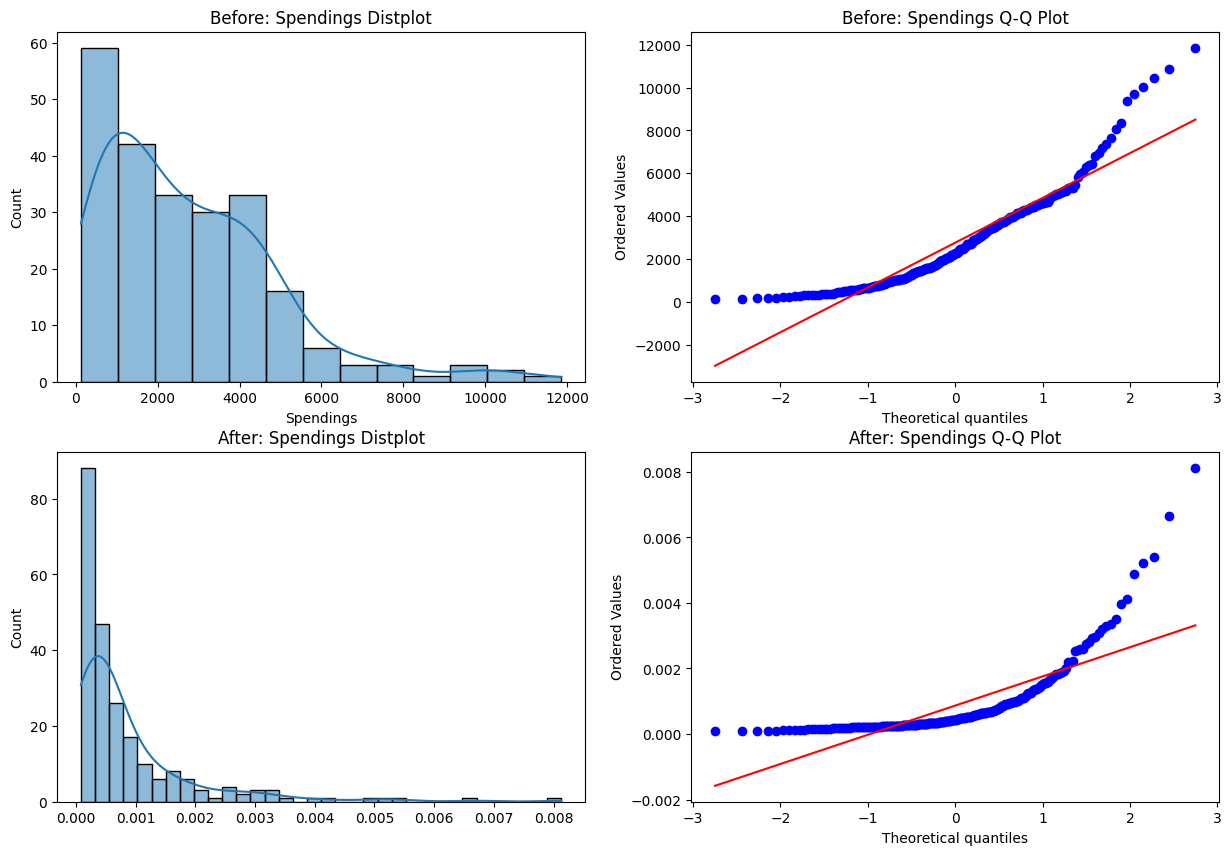

In [98]:
def different_transformers(transform_it):
    trf = ColumnTransformer(transformers=[
        ("Spendings", FunctionTransformer(func=transform_it, validate=False), [0])
    ], remainder='passthrough')
    
    trf.fit(x_train)
    x_train_transformation = trf.transform(x_train)
    x_test_transformation = trf.transform(x_test)
    
    logistic = LogisticRegression()

    logistic.fit(x_train_transformation, y_train)

    logistic_pred = logistic.predict(x_test_transformation)

    print("Accuracy of Logistic Regression : ", accuracy_score(y_test, logistic_pred))

    figure, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

    sns.histplot(x_train["Spendings"], kde=True, ax=axes[0, 0])
    axes[0, 0].set_title("Before: Spendings Distplot")

    stats.probplot(x_train["Spendings"], dist="norm", plot=axes[0, 1])
    axes[0, 1].set_title("Before: Spendings Q-Q Plot")

    sns.histplot(x_train_transformation[:, 0], kde=True, ax=axes[1, 0])
    axes[1, 0].set_title("After: Spendings Distplot")

    stats.probplot(x_train_transformation[:, 0], dist="norm", plot=axes[1, 1])
    axes[1, 1].set_title("After: Spendings Q-Q Plot")

different_transformers(lambda x: 1/x)
# different_transformers(lambda x: x**2)
# different_transformers(lambda x: x**1/2)
# different_transformers(np.log1p)
# different_transformers(np.log)
# different_transformers(lambda x: 1/(x+0.01))  "if zero found, then it will handle easily by adding 0.01 to it"